### Introduction


This exploratory data analysis will be looking at the Allied Arial Bombardment campaign of World War Two (WW2).  The analysis will first look at factors in the campaign as a whole by looking at countable variables. This will be followed by a few time series analysis and lastly the analysis will take a look the conflict using Geo data and visualise the conflict using mapping visualisation to help bring new insights for historians. To quickly summaries what the Allied Arial Bombardment campaign was. The campaign is referred to the Allies Strategical bombing mission aimed at destroy the Axis’s war production efforts. The main targets were industry cities and major infrastructure objects like brigades and dams.  


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
from IPython.display import HTML


In [2]:
#importing data and converting data column to datatime unit of measurement 
 
df = pd.read_csv (r'C:\Users\paul_\Documents\Data and Programing\Visual Studio Code\data sets\operations.csv')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df['Mission Date']= pd.to_datetime(df['Mission Date'])

D:\an\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,8,11,13,31,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
# printing of column names for quickier and more arrcrete typing of code
df.columns


#exploration of the  ww2 Allied Arial Bombardment Campaign date set and check what interesting Analysis could be prefromed.
#HTML(df.to_html(classes = 'table table-striped'))


Index(['Mission ID', 'Mission Date', 'Theater of Operations', 'Country',
       'Air Force', 'Unit ID', 'Aircraft Series', 'Callsign', 'Mission Type',
       'Takeoff Base', 'Takeoff Location', 'Takeoff Latitude',
       'Takeoff Longitude', 'Target ID', 'Target Country', 'Target City',
       'Target Type', 'Target Industry', 'Target Priority', 'Target Latitude',
       'Target Longitude', 'Altitude (Hundreds of Feet)', 'Airborne Aircraft',
       'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
       'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
       'High Explosives', 'High Explosives Type',
       'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
       'Incendiary Devices', 'Incendiary Devices Type',
       'Incendiary Devices Weight (Pounds)',
       'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
       'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
       'Fragmentation Devices Weight (Tons)', 'To

### Exploratory Analysis of the Data Set

Here we will look at total value counts within certain columns to interesting insights

<AxesSubplot:title={'center':'Number of Missions Conducted by Country'}>

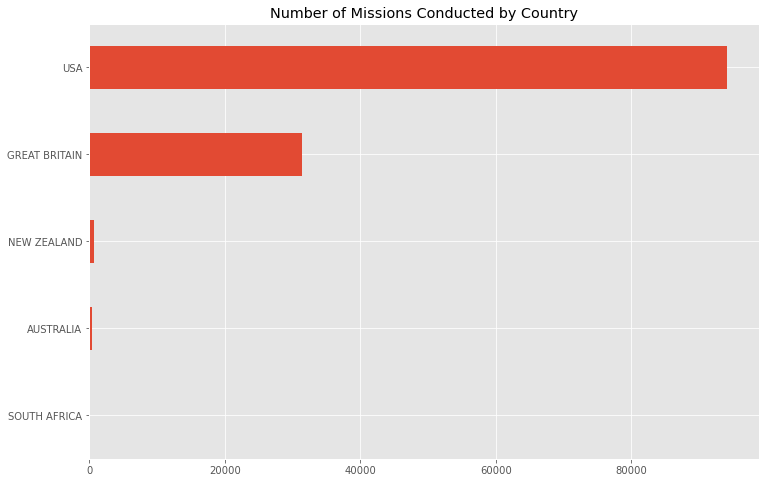

In [153]:
pilots = df['Country'].value_counts()
pilots = pilots.sort_values(ascending=True)
pilots.plot.barh(x='Number of Missions', y='Country',title='Number of Missions Conducted by Country' )

Above one sees the total number of missions divided by country. The USA is the country with the most operations which is not surprising given that it fought both the European and pacific theatre. They also did not have their industry bomb during the war and thus war time production stay stable  compared to that of the UK.

<AxesSubplot:title={'center':'Number Missions Conducted by Theater of Operations'}>

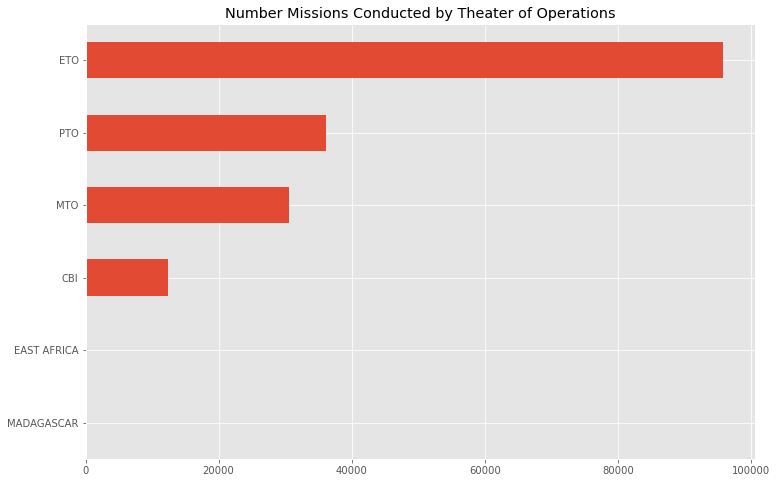

In [154]:
Theater_of_op = df['Theater of Operations'].value_counts(ascending=True)
Theater_of_op.plot.barh(x='Number of Missions', y='Theater of Operations',title='Number Missions Conducted by Theater of Operations' )

Above one sees the number of missions divided by theatre of operations. The top is the European theatre of operations with over 90,000 missions. Mostly like due to the fact the Allies could launch missions from England where as in the pacific theatre of operations aircraft carriers were needed to launch missions. What is interesting about this result is the number of missions launched in the CBI theatre of operations. The CBI stands for China, Burma and India theatre of operations that is less well known and under reported within the wider world war two historiography but non the less virtual in defeating Japan.

<AxesSubplot:title={'center':'Number Missions By Target Country'}>

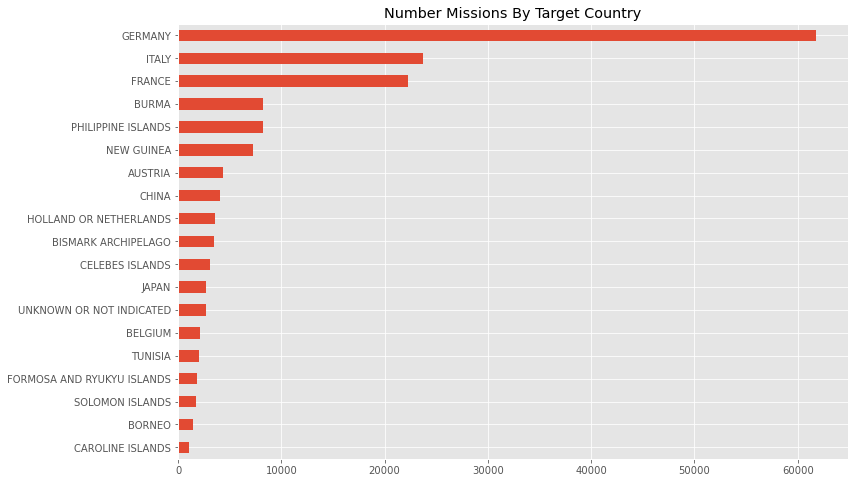

In [155]:

Target_country = df['Target Country'].value_counts(ascending=True).loc[lambda x : x>1000]
Target_country.plot.barh(x='Number of Missions', y='Target Country' ,title='Number Missions By Target Country' )

Above one sees the target counties which were bombed more than 1000 times. Unsurprisingly given that these countries were the primary targets of the Allied Arial Bombardment campaign. German or Nazi German was bombed the most with more than 60,000 time followed by Italy with around 25,000 times.

<AxesSubplot:title={'center':'Number Missions By Target City'}>

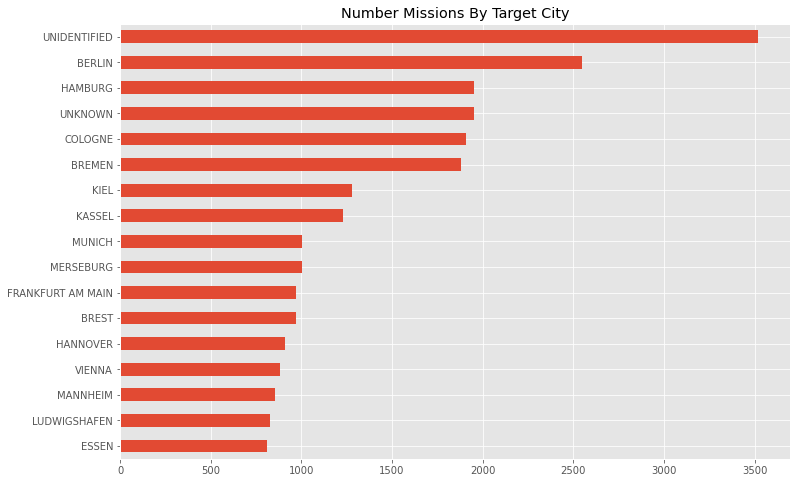

In [156]:
Target_cities = df['Target City'].value_counts(ascending=True).loc[lambda x : x>800]
Target_cities.plot.barh(x='Number of Missions', y='Target City' ,title='Number Missions By Target City' )

Above are the target cities which were bombed more than 800 times. As we see the majority of these cities are German which would make sense given how many missions were flown into Germen. What is interesting or maybe more troubling is the number of identified or unknown cities bombed which leads to ask what cities were targeted that lead to the officers to write these statements in their reports.

<AxesSubplot:title={'center':'Number Missions By Target Type'}>

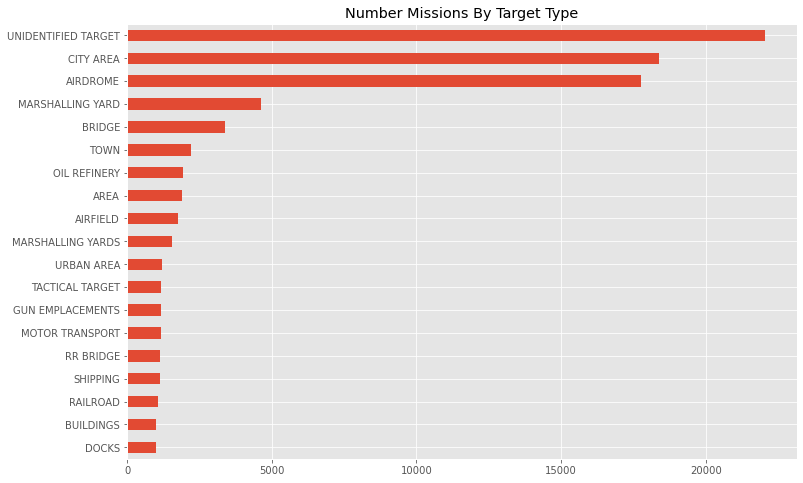

In [157]:
Target_Type = df['Target Type'].value_counts(ascending=True).loc[lambda x : x>1000]
Target_Type.plot.barh(x='Number of Missions', y='Target Type' ,title='Number Missions By Target Type' )

Above we see a list of targets which were bombed more than 1000 times by the Allies. This is very worrying pi picture as for the top two results are identified and city area. This is worrying because under The 1923 Hague Rules of Air Warfare, international law of the time states clearly that 

        “Art. 22 [Bombardment for the purpose of terror] Aerial bombardment for the purpose of terrorizing the civilian population, of destroying or damaging private property not of military character, or of injuring non-combatants is prohibit” 

                                                            And 
        
        “Art. 24.3 The bombardment of cities, towns, villages, dwellings or buildings not in the immediate neighbourhood of the operations of land forces is prohibited. In cases where the objectives specified in paragraph (2) are so situated, that they cannot be bombarded without the indiscriminate bombardment of the civilian population, the aircraft must abstain from bombardment.”

                            ref(https://international-review.icrc.org/sites/default/files/S0020860400071370a.pdf)


Main that the direct targeting of city areas should not have been a target especially not the most bombed target. Add to this the fact that towns and urban areas place higher than tactical targets eg military objects and gun emplacements. This evidence shows that the Allied Arial Bombardment campaign may have gone against international law of the time and raises questions of its ethical and moral under taking. 


<AxesSubplot:title={'center':'Number Missions By Takeoff Location'}>

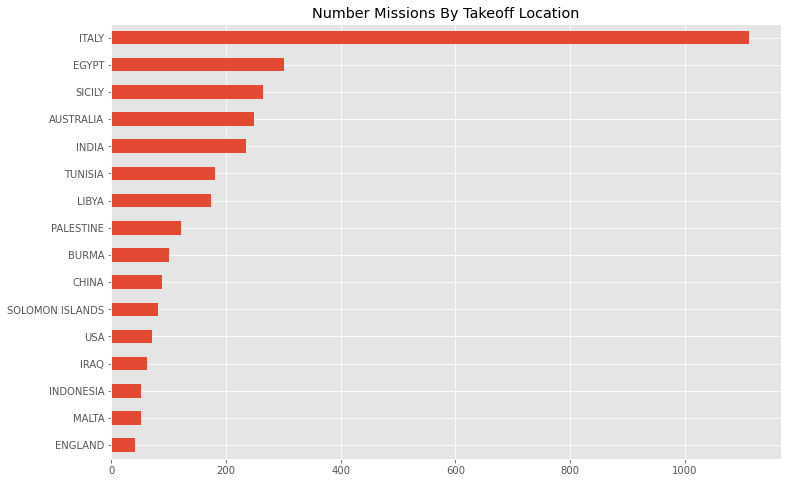

In [158]:
Takeoff_Location = df['Takeoff Location'].value_counts(ascending=True).loc[lambda x : x>40]
Takeoff_Location.plot.barh(x='Number of Missions', y='Takeoff Location' ,title='Number Missions By Takeoff Location' )

The last bar graph above before one moves to the time series analysis shows the top take off location of the Allied aircraft. Interesting the data shows Italy was the top take off location above England. This is interesting as majority of the people would think that England should be in the top place.

### Time Series Analysis

Here we will look at the time progression of the ww2 Allied arial bombardment campaign. 

<function matplotlib.pyplot.show(close=None, block=None)>

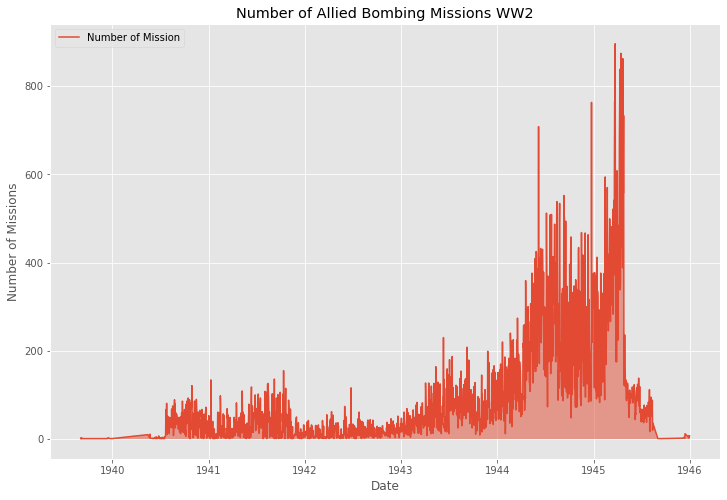

In [6]:
analysis_1 = df[['Mission Date','Mission ID']]

Mission_Date_sort = analysis_1['Mission Date'].drop_duplicates().sort_values(ascending=True)
Mission_count = analysis_1.groupby(['Mission Date'])['Mission ID'].count()

plt.plot(Mission_Date_sort , Mission_count, label='Number of Mission')
plt.title('Number of Allied Bombing Missions WW2')
plt.xlabel('Date')
plt.ylabel('Number of Missions')
plt.fill_between(Mission_Date_sort , Mission_count, alpha=0.50)
plt.legend()
plt.tight_layout
plt.show

The first time series analysis shows the number of missions conducted throughout the length of the war. This graph shows nicely how the air war in ww2 progressed. Firstly one sees in 1940 a shaper rise in missions during the Battle of Britain. Were most of the fighting was done in the air and at sea. Than this phase the air campaign becomes les important to the Allied war fighting strategy. Than after the battle of El Alamein and  beginning of the Italian bombing campaign the number of missions increased again. It’s also important to note that was also the time American official enter the war. The numbers than keep increasing in preparation for the D Day landings and the island hopping strategy in the pacific. Followed by a final push in 1945 were it is know clear that the Allies have complete air superiority over the Axis’s forces.

<function matplotlib.pyplot.show(close=None, block=None)>

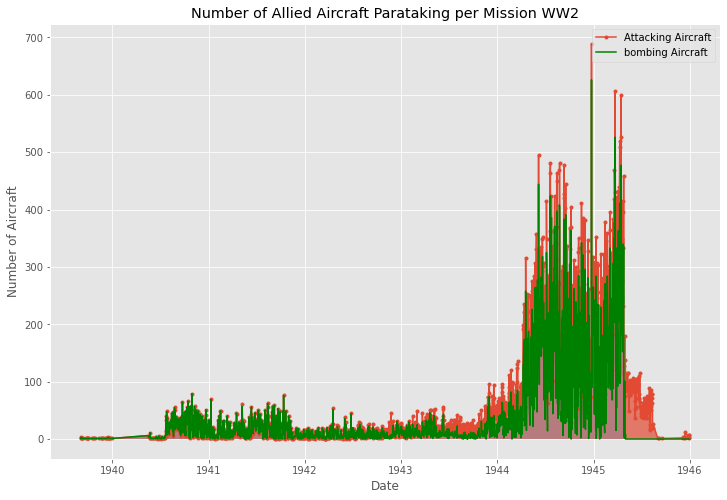

In [181]:
analysis_2 = df[['Mission Date','Attacking Aircraft', 'Bombing Aircraft','Aircraft Damaged','Aircraft Lost']]



Aircraft_Attacking = analysis_2.groupby(['Mission Date'])['Attacking Aircraft'].count()
Aircraft_bombing = analysis_2.groupby(['Mission Date'])['Bombing Aircraft'].count()

plt.plot(Mission_Date_sort , Aircraft_Attacking, label='Attacking Aircraft', marker= '.' )
plt.plot(Mission_Date_sort , Aircraft_bombing, label='bombing Aircraft', color='green')


plt.title('Number of Allied Aircraft Parataking per Mission WW2')
plt.xlabel('Date')
plt.ylabel('Number of Aircraft')
plt.fill_between(Mission_Date_sort, Aircraft_Attacking, alpha=0.70)
plt.fill_between(Mission_Date_sort, Aircraft_bombing, alpha=0.25)
plt.legend()
plt.tight_layout
plt.show

Above one sees the number of attacking aircraft such as the de Havilland DH.98 Mosquito and bombing aircraft like the Avro Lancaster. One can see that the number of aircraft dose not differ greatly during the majority of the air campaign showing that the Allies attacked a mix of tactical and strategic targets. The only two places were attacking aircraft numbers are significantly higher than bombing ones is halfway 1943 and beginning 1944. This would suggest that the allies targeted prioritising tactical targets which would make sense as they were preparing for the D day landings and fighting a retreating Axis armies.  Again at the end of 1945 the number of attacking aircraft is higher showing that allies are mopping up last pockets of military residences and that the strategic objectives have been met.

<function matplotlib.pyplot.show(close=None, block=None)>

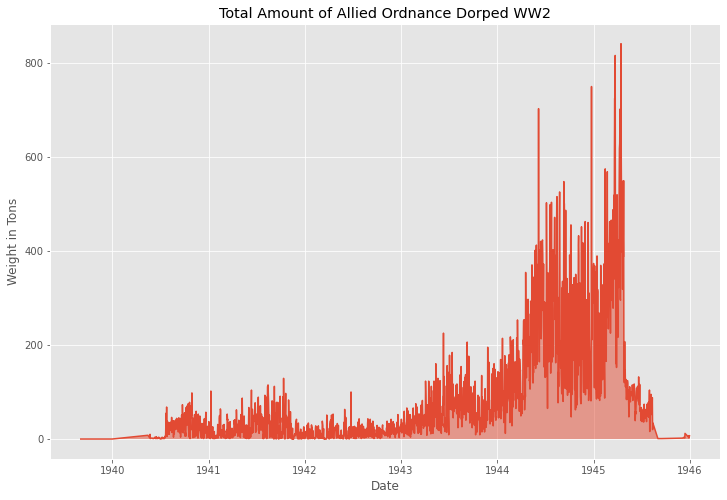

In [166]:
analysis_3 = df[['Mission Date','High Explosives Weight (Tons)','Incendiary Devices Weight (Tons)','Fragmentation Devices Weight (Tons)','Total Weight (Tons)']]

Total= analysis_3.groupby(['Mission Date'])['Total Weight (Tons)'].count()

plt.plot(Mission_Date_sort , Total)

plt.title('Total Amount of Allied Ordnance Dorped WW2')
plt.xlabel('Date')
plt.ylabel('Weight in Tons')
plt.fill_between(Mission_Date_sort, Total, alpha=0.50)
plt.tight_layout
plt.show

Above one sees the amount of ordnance dropped by the Allies in WW2. One can see that at two points the allied dropped over 800 tons of ordnance in a single month. That is the equivalent 1,792,000 500 pound bombs which were the standard bomb type of the Allied forces. For simplicity, lets claim a bomber carries 6 500 pound bombs. That would mean that in this month the allied flew 293,666 planes over enemy territory and 818 planes per day.

<function matplotlib.pyplot.show(close=None, block=None)>

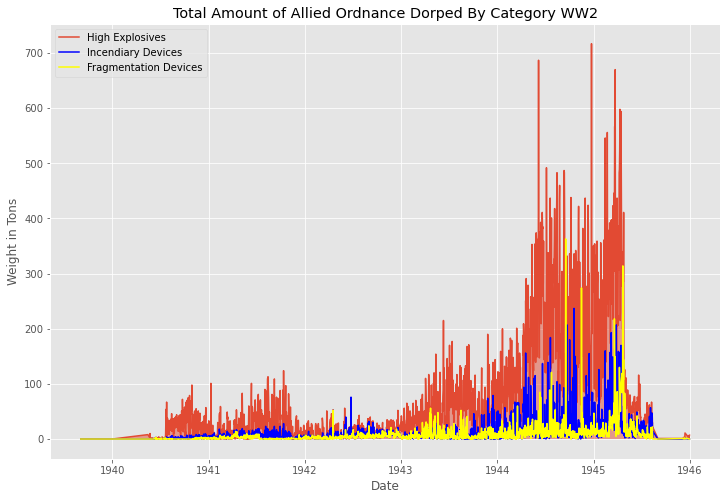

In [175]:
High_Explosives = analysis_3.groupby(['Mission Date'])['High Explosives Weight (Tons)'].count()
Incendiary_Devices = analysis_3.groupby(['Mission Date'])['Incendiary Devices Weight (Tons)'].count()
Fragmentation_Devices= analysis_3.groupby(['Mission Date'])['Fragmentation Devices Weight (Tons)'].count()


plt.plot(Mission_Date_sort , High_Explosives, label='High Explosives')
plt.plot(Mission_Date_sort , Incendiary_Devices, label='Incendiary Devices', color='blue')
plt.plot(Mission_Date_sort , Fragmentation_Devices, label='Fragmentation Devices', color='yellow')


plt.title('Total Amount of Allied Ordnance Dorped By Category WW2')
plt.xlabel('Date')
plt.ylabel('Weight in Tons')
plt.fill_between(Mission_Date_sort, High_Explosives, alpha=0.50)
plt.legend()
plt.tight_layout
plt.show


Above one can see the different types of ordnance dropped by the Allies in WW2. The major of ordnance dropped unsurprisingly is high explosive which is used to destroy buildings. The next type to be drop is incendiary used to create fire storms which can destroy large areas with one single attack. What is interesting about this graph is that fragmentation ordnance saw a shaper increase in use during 1943. This is the turning point in the WW2 for the Allies and shows us that the air force was most likely allies targeted prioritising tactical targets as these bombs are not effective against buildings at all. This would back the findings found in the attacking and bombing aircraft graph strengthening our argumentation that the allies were preparing for the D day landings and fighting a retreating Axis armies after winning device victories.

### Geo Mapping Analysis

Here one will see the data visualised through maps. The idea is to show how the Allied arial bombardment campaign spread across the global year by year.

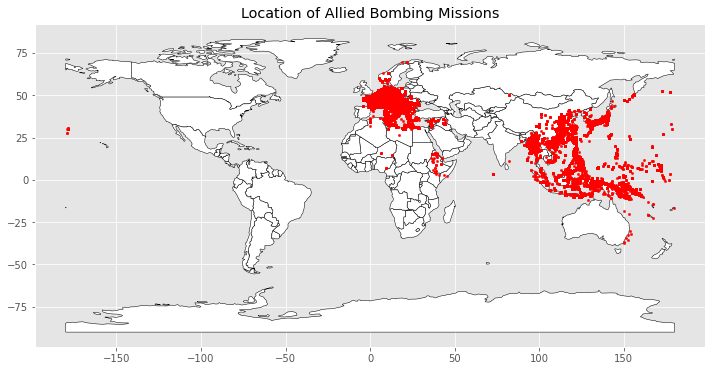

In [164]:
analysis_4 = df[['Target Latitude','Target Longitude']]
analysis_4= analysis_4.rename(columns = {'Target Latitude' : 'Target_Latitude', 'Target Longitude' : 'Target_Longitude' })
analysis_4 = analysis_4[analysis_4['Target_Longitude'] < 200 ]
analysis_4 = analysis_4[analysis_4['Target_Latitude'] < 100 ]


dfgeo_1 = gpd.GeoDataFrame(analysis_4, geometry=gpd.points_from_xy(analysis_4.Target_Longitude, analysis_4.Target_Latitude))
base = world.plot(color='white', edgecolor='black')
dfgeo_1.plot(ax=base, marker='o', color='red', markersize=5);
plt.title('Location of All Allied Bombing Missions')
plt.show()



Above one can see a world map of all the target locations of the Allied Air Force during the entry length of WW2. This maps gives us a scale of just how far this conflict spread across the global.

In [225]:
# coded use to filter target location by year else pd was not able to sort dateset by datetime column.

import datetime
analysis_5 = df[['Mission Date','Target Latitude','Target Longitude']]
analysis_5 = analysis_5.set_index('Mission Date').sort_index()


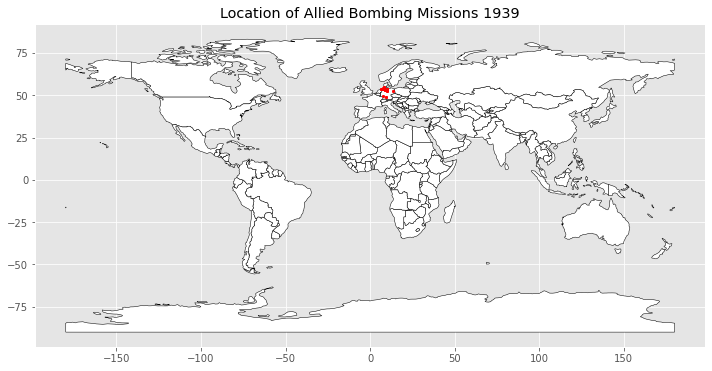

In [226]:
analysis_1939 = analysis_5['1939-01-01':'1939-12-31']
analysis_1939= analysis_1939.rename(columns = {'Target Latitude' : 'Target_Latitude', 'Target Longitude' : 'Target_Longitude' })
analysis_1939 = analysis_1939[analysis_1939['Target_Longitude'] < 200 ]
analysis_1939 = analysis_1939[analysis_1939['Target_Latitude'] < 100 ]

dfgeo_2 = gpd.GeoDataFrame(analysis_1939, geometry=gpd.points_from_xy(analysis_1939.Target_Longitude, analysis_1939.Target_Latitude))
base = world.plot(color='white', edgecolor='black')
dfgeo_2.plot(ax=base, marker='o', color='red', markersize=5);
plt.title('Location of Allied Bombing Missions 1939')
plt.show()


In 1939, one can see that the Allied Arial Bombing campaign was limited to German and its industrial heart lands in the south and ports in the north.

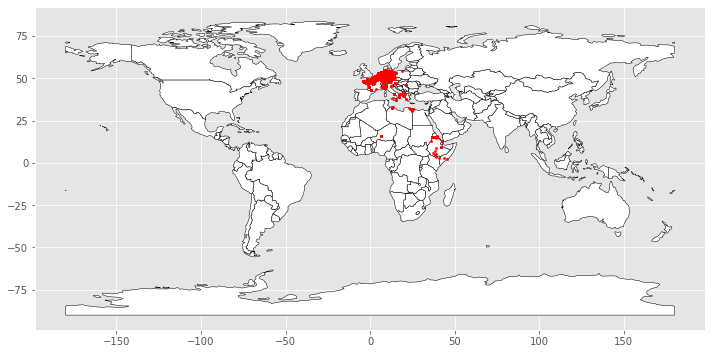

In [213]:
analysis_1940 = analysis_5['1940-01-01':'1940-12-31']
analysis_1940= analysis_1940.rename(columns = {'Target Latitude' : 'Target_Latitude', 'Target Longitude' : 'Target_Longitude' })
analysis_1940 = analysis_1940[analysis_1940['Target_Longitude'] < 200 ]
analysis_1940 = analysis_1940[analysis_1940['Target_Latitude'] < 100 ]

dfgeo_2 = gpd.GeoDataFrame(analysis_1940, geometry=gpd.points_from_xy(analysis_1940.Target_Longitude, analysis_1940.Target_Latitude))
base = world.plot(color='white', edgecolor='black')
dfgeo_2.plot(ax=base, marker='o', color='red', markersize=5);
plt.title('Location of Allied Bombing Missions 1940')
plt.show()

In 1940, one can see that the conflict has spread across Europe and the Mediterranean into north Africa and the Italian colony of Abyssinian Morden day Ethiopia. Showing the British were engaging the Italian overseas territories from 1940 onwards which is very interesting given set backs the British army had in France.

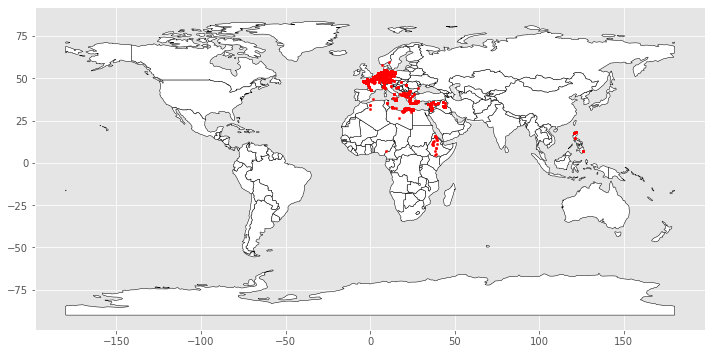

In [216]:
analysis_1941 = analysis_5['1941-01-01':'1941-12-31']
analysis_1941= analysis_1941.rename(columns = {'Target Latitude' : 'Target_Latitude', 'Target Longitude' : 'Target_Longitude' })
analysis_1941 = analysis_1941[analysis_1941['Target_Longitude'] < 200 ]
analysis_1941 = analysis_1941[analysis_1941['Target_Latitude'] < 100 ]

dfgeo_2 = gpd.GeoDataFrame(analysis_1941, geometry=gpd.points_from_xy(analysis_1941.Target_Longitude, analysis_1941.Target_Latitude))
base = world.plot(color='white', edgecolor='black')
dfgeo_2.plot(ax=base, marker='o', color='red', markersize=5);
plt.title('Location of Allied Bombing Missions 1941')
plt.show()

In 1941, one can see that conflict has spread further into the Mediterranean through the Axis victory at Crete. This gave them the ability to invade the  Middle East and began what as the North African campaign were the Axis tried to invade British territories notably Egypt and the French colonies who were still fight under the leadership of General De Gaulle.

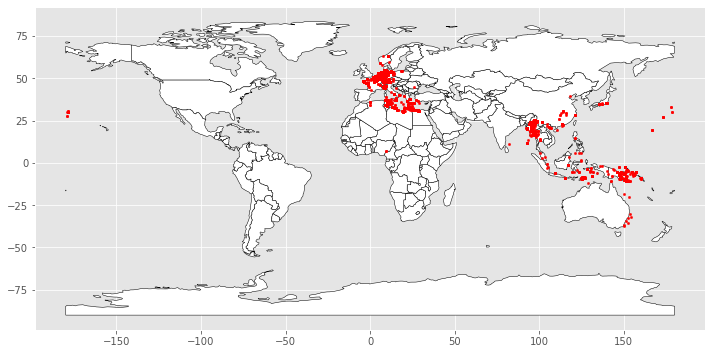

In [217]:
analysis_1942 = analysis_5['1942-01-01':'1942-12-31']
analysis_1942= analysis_1942.rename(columns = {'Target Latitude' : 'Target_Latitude', 'Target Longitude' : 'Target_Longitude' })
analysis_1942 = analysis_1942[analysis_1942['Target_Longitude'] < 200 ]
analysis_1942 = analysis_1942[analysis_1942['Target_Latitude'] < 100 ]

dfgeo_2 = gpd.GeoDataFrame(analysis_1942, geometry=gpd.points_from_xy(analysis_1942.Target_Longitude, analysis_1942.Target_Latitude))
base = world.plot(color='white', edgecolor='black')
dfgeo_2.plot(ax=base, marker='o', color='red', markersize=5);
plt.title('Location of Allied Bombing Missions 1942')
plt.show()

In 1942, one can see that the conflict in the middle east is over and has moved into Tunisia in the direction of Italy. This is because of the Allied victory at El Alamein which pushed the Axis forces out of north Africa. With the attack on Pearl Harbour the Americans enter the war and it is clear to see that is now heavy flight in the Pacific with Japan’s blitz through the region. What is interesting is to see that there is also significant activity around Burma as the Japanese try to invade India a lesser well known fact in the WW2 story but had huge significance for the fighting in the pacific.

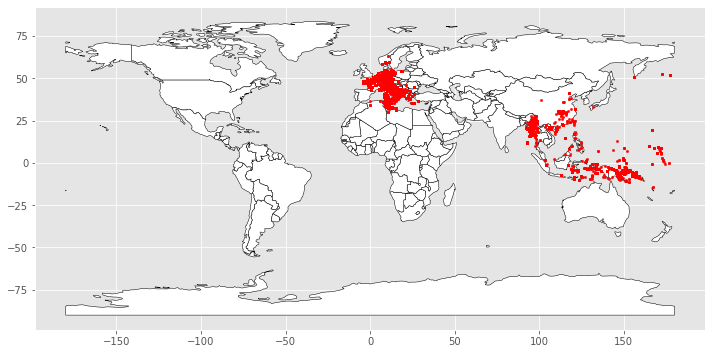

In [218]:
analysis_1943 = analysis_5['1943-01-01':'1943-12-31']
analysis_1943= analysis_1943.rename(columns = {'Target Latitude' : 'Target_Latitude', 'Target Longitude' : 'Target_Longitude' })
analysis_1943 = analysis_1943[analysis_1943['Target_Longitude'] < 200 ]
analysis_1943 = analysis_1943[analysis_1943['Target_Latitude'] < 100 ]

dfgeo_2 = gpd.GeoDataFrame(analysis_1943, geometry=gpd.points_from_xy(analysis_1943.Target_Longitude, analysis_1943.Target_Latitude))
base = world.plot(color='white', edgecolor='black')
dfgeo_2.plot(ax=base, marker='o', color='red', markersize=5);
plt.title('Location of Allied Bombing Missions 1943')
plt.show()

In 1943, one can clearly see that the Axis are being pushed back into Europe and that the Italian campaign has begun as the Allies begin to take back Europe. It is also clear that fighting in the pacific is intensifying as Americans Island hopping strategy can be clearly seen. Plus there is activity over China showing that Japan is being pushed back out of Burma. 

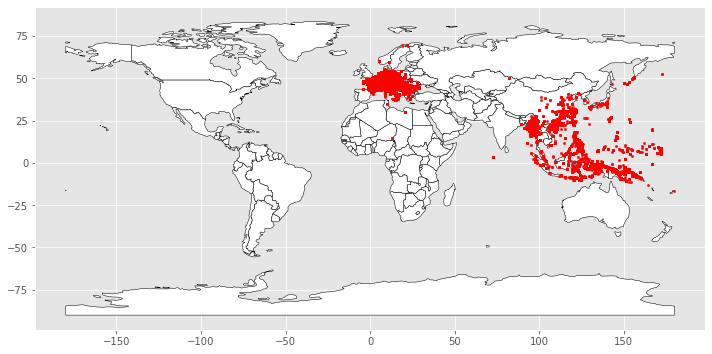

In [220]:
analysis_1944 = analysis_5['1944-01-01':'1944-12-31']
analysis_1944= analysis_1944.rename(columns = {'Target Latitude' : 'Target_Latitude', 'Target Longitude' : 'Target_Longitude' })
analysis_1944 = analysis_1944[analysis_1944['Target_Longitude'] < 200 ]
analysis_1944 = analysis_1944[analysis_1944['Target_Latitude'] < 100 ]

dfgeo_2 = gpd.GeoDataFrame(analysis_1944, geometry=gpd.points_from_xy(analysis_1944.Target_Longitude, analysis_1944.Target_Latitude))
base = world.plot(color='white', edgecolor='black')
dfgeo_2.plot(ax=base, marker='o', color='red', markersize=5);
plt.title('Location of Allied Bombing Missions 1944')
plt.show()

In 1944, one can see the Allied bombing campaign has increased over German in supporting the D Day landings. In the pacific theatre one can see that the Allies are closing in on Japan and attacking the mainland and Japan’s surrounding islands like the island of Iwo Jima showing the success of the Allies island hopping strategy.

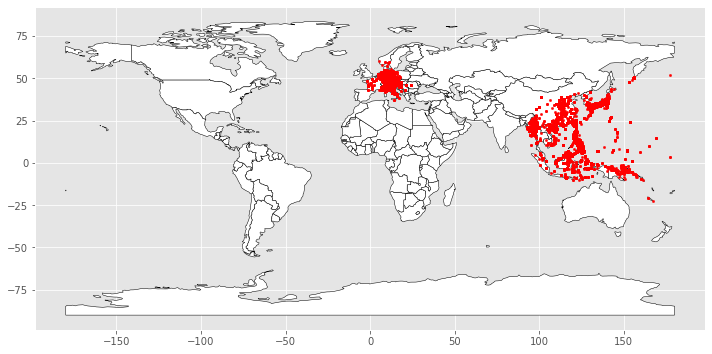

In [222]:
analysis_1945 = analysis_5['1945-01-01':'1945-12-31']
analysis_1945= analysis_1945.rename(columns = {'Target Latitude' : 'Target_Latitude', 'Target Longitude' : 'Target_Longitude' })
analysis_1945 = analysis_1945[analysis_1945['Target_Longitude'] < 200 ]
analysis_1945 = analysis_1945[analysis_1945['Target_Latitude'] < 100 ]

dfgeo_2 = gpd.GeoDataFrame(analysis_1945, geometry=gpd.points_from_xy(analysis_1945.Target_Longitude, analysis_1945.Target_Latitude))
base = world.plot(color='white', edgecolor='black')
dfgeo_2.plot(ax=base, marker='o', color='red', markersize=5);
plt.title('Location of Allied Bombing Missions 1945')
plt.show()

In the final year of the war 1945. One can see that the Air campaign over Europe is Lessing as the Allied army capture Nazi German. One can now also see the consent attack of the Japanese home land the Allies close in and get ready to invade Japan. However, before this happens the nuclear bombs at Hiroshima and Nagasaki bring an end to WW2. 

### Conclusion

In conclusion this data exploratory analysis has helped shed light on WW2 and the Allied Arial Bombardment Campaign through the war. Two interesting discoveries from this exploratory analysis is the finding that Common allied Targets were in fact cities which would bring into question whether the Allies broke international Law at the time by engaging in the Arial Bombardment Campaign. The other is that one can calculate how many bombs were dropped and be shocked at the scale at which the Allies bombarded the Axis forces especially during the ending year of the war. By using GEO data one can see exactly how WW2 progressed over the global and its amazing to see how it lines up with showing the progression of the conflict and how major battles changed the GEO data on the map. The GEO analysis also helps to hight the Burma campaign and its significance to WW2 for it is often over looked in many history text books.  